## Imports

In [3]:
from collections import namedtuple, defaultdict
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 300



Result = namedtuple('Result', ['partisans', "sims"])
Sim = namedtuple("Sim", ["asymptotic", "non_partisans_mean"])

In [4]:
PARTISAN_BIAS = 0.3
TRUE_BIAS = 0.6

## Load data

In [11]:
import json
Dwell = namedtuple("Dwell", ["n", "mean", "stdev"])
# results_by_partisan[0.01] = [ aggdwells dist 0,  aggdwells dist 1, ... ]


with open("../output/bigexperiment-2023_02_23-00_39_03.log", 'r') as f:
    max_distances = max(len(json.loads(line)['d']) for line in f)
    results_by_partisan = defaultdict(lambda: [[] for x in range(max_distances)])

rows = []
with open("../output/bigexperiment-2023_02_23-00_39_03.log", 'r') as f:
    for line in f:
        d = json.loads(line)

        for dist, (n, mean, stdev) in enumerate(d['d']):
            rows.append(dict(partisans= d['p'], dist= dist, n= n, mean= mean, stdev= stdev))
            results_by_partisan[d['p']][dist].append(Dwell(n, mean, stdev))

df = pd.DataFrame(rows)

In [12]:
df.groupby('partisans')

In [13]:
df

,partisans,dist,n,mean,stdev
0,0.01,0,1,10000.000000,0.000000
1,0.01,1,26,2.503241,1.963310
2,0.01,2,60,3.427841,4.213609
3,0.01,3,13,6.527707,8.200279
4,0.01,0,1,10000.000000,0.000000
...,...,...,...,...,...
249326,0.99,1,2,4996.500000,5768.310238
249327,0.99,0,98,10000.000000,0.000000
249328,0.99,1,2,4996.500000,5752.180137
249329,0.99,0,98,10000.000000,0.000000


In [15]:
def find_min_max(x):
    return min(x), max(x)

In [28]:
df_dist_1 = df[df.dist == 1]
df_dist_2 = df[df.dist == 2]
df_dist_3 = df[df.dist == 3]
df_dist_4 = df[df.dist == 4]


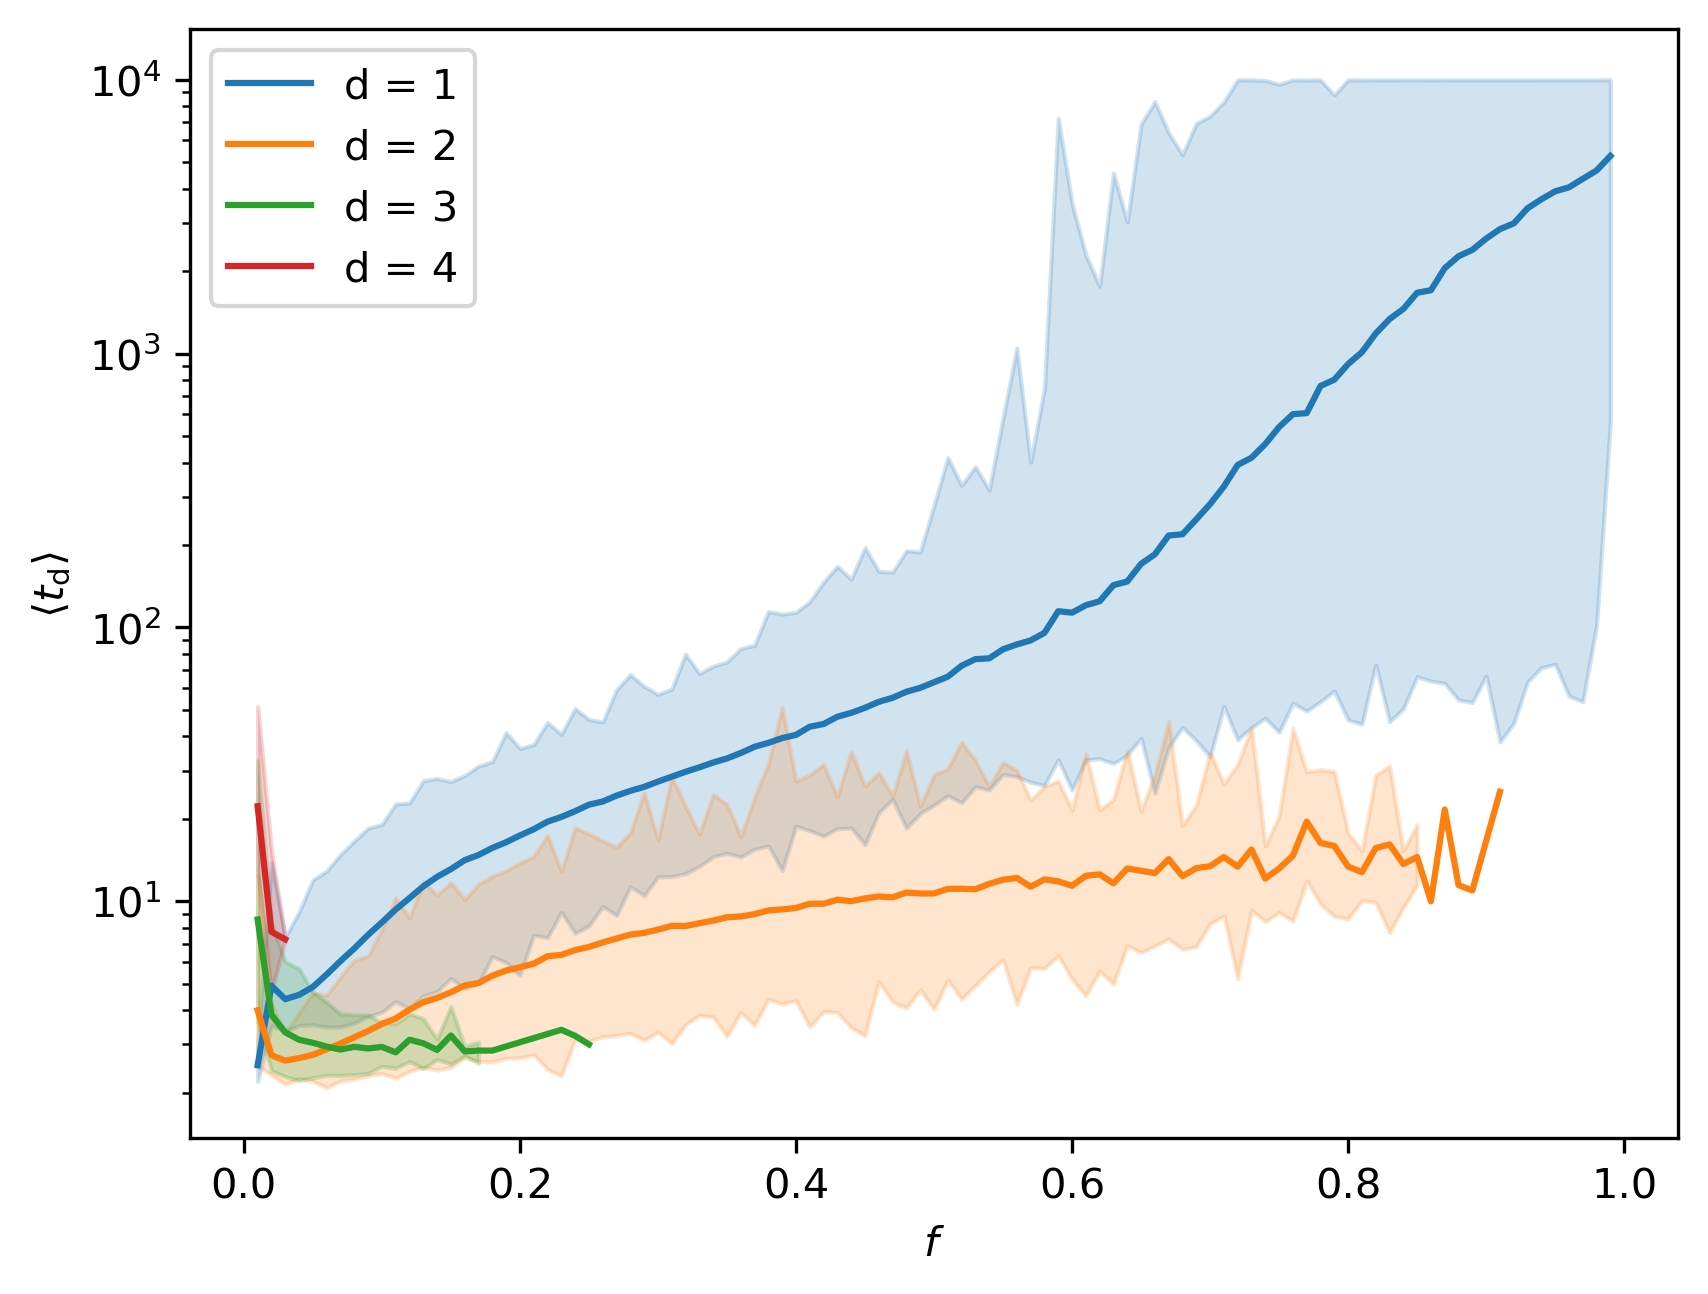

In [43]:
sns.lineplot(df_dist_1, x="partisans", y="mean", errorbar= find_min_max, label="d = 1")
sns.lineplot(df_dist_2, x="partisans", y="mean", errorbar= find_min_max, label="d = 2")
sns.lineplot(df_dist_3, x="partisans", y="mean", errorbar= find_min_max, label="d = 3")
sns.lineplot(df_dist_4, x="partisans", y="mean", errorbar= find_min_max, label="d = 4")
plt.legend()
plt.xlabel("$f$")
plt.ylabel("$\\langle t_{\\rm d} \\rangle$")
plt.yscale("log")
# plt.xscale("log")



### Hist